<center>
<img src="../../img/ods_stickers.jpg">
## Открытый курс по машинному обучению. Сессия № 2
</center>
Автор материала: программист-исследователь Mail.ru Group, старший преподаватель Факультета Компьютерных Наук ВШЭ Юрий Кашницкий. Материал распространяется на условиях лицензии [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/). Можно использовать в любых целях (редактировать, поправлять и брать за основу), кроме коммерческих, но с обязательным упоминанием автора материала.

# <center>Тема 7. Обучение без учителя
## <center>Часть 1. Метод главных компонент

Существует несколько эквивалентных математических формулировок метода главных компонент. Основная идея заключается в нахождении таких попарно ортогональных направлений в исходном многомерном пространстве, вдоль которых данные имеют наибольший разброс (выборочную дисперсию). Эти направления называются главными компонентами. 

Другая формулировка PCA – для данной многомерной случайной величины построить такое ортогональное преобразование координат, что в результате корреляции между отдельными координатами обратятся в ноль. Таким образом, задача сводится к диагонализации матрицы ковариаций, что эквивалентно нахождению сингулярного разложения матрицы исходных данных. Хотя формально задачи сингулярного разложения матрицы данных и спектрального разложения ковариационной матрицы совпадают, алгоритмы вычисления сингулярного разложения напрямую, без вычисления ковариационной матрицы и её спектра, более эффективны и устойчивы.

Ещё одной из формулировок задачи PCA является нахождение такой $d$-мерной плоскости в признаковом пространстве, что ошибка проецирования обучающих объектов на нее будет минимальной. Направляющие векторы этой плоскости и будут первыми $d$ главными компонентами.

### Интуиция метода

Рассмотрим двухмерный пример, где вместо двух признаков можно завести их линейную комбинацию.

Для "хорошего"направления сумма расстояний до выбранной прямой (гиперплоскости) минимальна. Слева показано "хорошее" направление, справа – "плохое".

<img src='../../img/pca_good_bad_direction.png'>

Пусть прямая задается единичным вектором $u$. Минимизация расстояния от точки $x^{(i)}$ до прямой эквивалентна минимизации угла между радиус-вектором $x^{(i)}$ и вектором $u$. Косинус такого угла можно выразить так:

$$ \Large cos~\theta = \frac{x^{{(i)}^T} u }{||x^{(i)}||}, ||u|| = 1$$

Задача состоит в том, чтобы найти такое направление $u$, что сумма квадратов проекций минимальна (то есть сумма квадратов косинусов максимальна). 

$$\Large u = \arg\max_{||u||=1} \frac{1}{m} \sum_{i=1}^{m} {(x^{{(i)}^T} u )^2} = \arg\max_{||u||=1} \frac{1}{m} \sum_{i=1}^{m} {(u^Tx^{{(i)}} )(x^{{(i)}^T} u )} =$$ $$ \Large  \arg\max_{||u||=1} u^T \left[\frac{1}{m} \sum_{i=1}^{m}{x^{(i)} x^{(i)^T}} \right] u $$

Удобно ввести ковариационную матрицу $$\Large \Sigma = \sum_{i=1}^{m}{x^{(i)} x^{(i)^T}} = X^TX \in \mathbb{R}^{n \times n}$$

Тогда решается оптимизационная задача:

$$\Large \max_{u}{u^T \Sigma u},~~~u^Tu = 1$$

Лагранжиан для этой задачи: $$\Large L(u, \lambda) = u^T \Sigma u - \lambda (u^Tu-1)$$

Его производная по $u$: $$\Large \nabla_u L = \Sigma u - \lambda u = 0 \Leftrightarrow \Sigma u =\lambda u$$

То есть $u$ должен быть собственным вектором ковариационной матрицы $\Sigma$.

Обобщение: если хотим ввести $k$-размерное пространства вместо $n$- размерного, берем $k$ собственных векторов ковариационной матрицы $\Sigma$, соответсвующих $k$ максимальным собственным значениям. Тогда новым образом каждой точки $x^{(i)} \in \mathbb{R}^n$ обучающей выборки будет 
$$\Large z^{(i)} = \left[
\begin{array}{c}
u_1^Tx^{(i)} \\ 
u_2^Tx^{(i)} \\ 
\ldots \\ 
u_k^Tx^{(i)} 
\end{array}
\right] \in \mathbb{R}^k$$

Один из наиболее эффективных способов нахождения собственных векторов матрицы $\Sigma$ - использование сингулярного разложения исходной матрицы $X$:

$$\Large X = UDV^T,$$

где $U \in R^{m \times m}$,  $V \in R^{n \times n}$, а $D \in R^{m \times n}$ - диагональная матрица вида

<img src='../../img/svd_diag_matrix.png' width=70%>

### Сингулярное разложение

Рассмотрим более подробно задачу о сингулярном разложении матрицы $X \in \mathbb{R}^{m \times n}$. 
*Сингулярным разложением* матрицы $X$ называется представление её в виде $X = UD V^T$, где:

 - $D$ есть $m\times n$ матрица у которой элементы, лежащие на главной диагонали, неотрицательны, а все остальные элементы равны нулю.
 - $U$ и $V$ – ортогональные матрицы порядка $m$  и $n$ соответственно.
 
Элементы главной диагонали матрицы $D$ называются *сингулярными числами* матрицы $X$, а столбцы $U$ и $V$ левыми и правыми *сингулярными векторами* матрицы $X$.

Заметим, что матрицы $XX^T$ и $X^TX$ являются симметрическими неотрицательно определенными матрицами, и поэтому ортогональным преобразованием могут быть приведены к диагональному виду, причем на диагонали будут стоять неотрицательные собственные значения этих матриц.

В силу указанных выше свойств матриц $X^TX$ и $XX^T$ сингулярное разложение матрицы $X$ тесно связано с задачей о спектральном разложении этих матриц. Более точно:
- Левые сингулярные векторы матрицы $X$ – это собственные векторы матрицы $XX^T$.
- Правые сингулярные векторы матрицы $X$ – это собственные векторы матрицы $X^TX$.
- Сингулярные числа матрицы $X$ - это корни из собственных значений матрицы $X^TX$ (или $XX^T$).

Таким образом, для нахождения сингулярного разложения матрицы $X$ необходимо, найти собственные векторы и значения матриц $X^TX$ и $XX^T$ и составить из них матрицы $U, V, D$.

### Алгоритм PCA
1. Определить $k<n$ – новую размерность
2. Вычесть из $X$ среднее, то есть заменить все $\Large x^{(i)}$  на $$\Large  x^{(i)} - \frac{1}{m} \sum_{i=1}^{m}{x^{(i)}}$$
3. Привести данные к единичной дисперсии: посчитать $$\Large  \sigma_j^2 = \frac{1}{m} \sum_{i=1}^{m}{(x^{(i)})^2}$$
и заменить $\Large x_j^{(i)}$ на $\Large \frac{x_j^{(i)}}{\sigma_j}$ 
4. Найти сингулярное разложение матрицы $X$:
$$\Large X = UDV^T$$
5. Положить $V =$ [$k$ левых столбцов матрицы $V$]
6. Вернуть новую матрицу $$\Large Z = XV \in \mathbb{R}^{m \times k}$$

### Двухмерный пример

Чтобы понять геометрический смысл главных компонент, рассмотрим в качестве примера выборку из двухмерного нормального распределения с явно выраженным "главным" направлением. Выделим в ней главные компоненты и посмотрим, какую долю дисперсии объясняет каждая из них.

In [1]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

<ipython-input-2-7ad62c0d2457>:5: RuntimeWarning: covariance is not positive-semidefinite.
  X = np.random.multivariate_normal(mean, cov, 300)


Proportion of variance explained by each component:
1st component - 0.94,
2nd component - 0.06

Directions of principal components:
1st component: [-0.57532172  0.81792721] 
2nd component: [-0.81792721 -0.57532172]


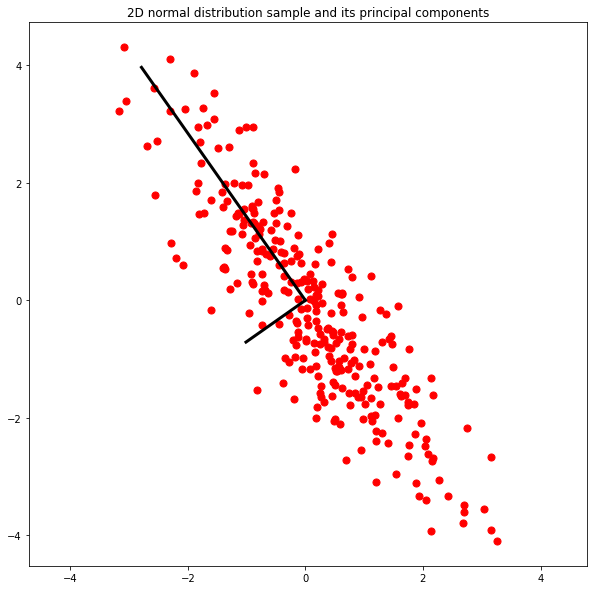

In [2]:
np.random.seed(0)
mean = np.array([0.0, 0.0])
cov = np.array([[1.0, -1.0], 
                [-2.0, 3.0]])
X = np.random.multivariate_normal(mean, cov, 300)

pca = PCA()
pca.fit(X)
print('Proportion of variance explained by each component:\n' +\
      '1st component - %.2f,\n2nd component - %.2f\n' %
      tuple(pca.explained_variance_ratio_))
print('Directions of principal components:\n' +\
      '1st component:', pca.components_[0],
      '\n2nd component:', pca.components_[1])

plt.figure(figsize=(10,10))
plt.scatter(X[:, 0], X[:, 1], s=50, c='r')
for l, v in zip(pca.explained_variance_ratio_, pca.components_):
    d = 5 * np.sqrt(l) * v
    plt.plot([0, d[0]], [0, d[1]], '-k', lw=3)
plt.axis('equal')
plt.title('2D normal distribution sample and its principal components')
plt.show()

Первая главная компонента (ей соответствует более длинный вектор) объясняет более 90% дисперсии исходных данных. Это говорит о том, что она содержит в себе почти всю информацию о расположении выборки в пространстве, и вторая компонента может быть опущена. Спроецируем данные на первую компоненту.

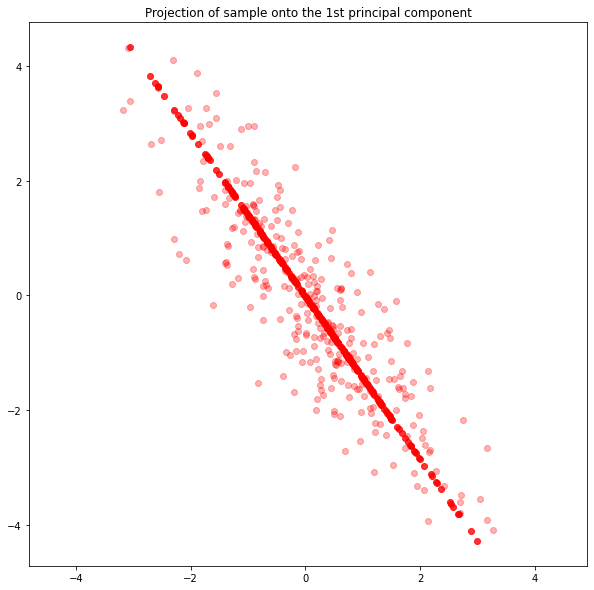

In [3]:
# Keep enough components to explain 90% of variance
pca = PCA(0.90)
X_reduced = pca.fit_transform(X)

# Map the reduced data into the initial feature space
X_new = pca.inverse_transform(X_reduced)

plt.figure(figsize=(10,10))
plt.plot(X[:, 0], X[:, 1], 'or', alpha=0.3)
plt.plot(X_new[:, 0], X_new[:, 1], 'or', alpha=0.8)
plt.axis('equal')
plt.title('Projection of sample onto the 1st principal component')
plt.show()

Мы понизили размерность данных вдвое, при этом сохранив наиболее значимые черты. В этом заключается основной принцип понижения размерности – приблизить многомерный набор данных с помощью данных меньшей размерности, сохранив при этом как можно больше информации об исходных данных.

### Визуализация многомерных данных

Одним из применений метода главных компонент является визуализации многомерных данных в двухмерном (или трехмерном) пространстве. Для этого необходимо взять первые две главных компоненты и спроецировать данные на них. При этом, если признаки имеют различную природу, их следует отмасштабировать. Основные способы масштабирования:
- На единичную дисперсию по осям (масштабы по осям равны средним квадратичным отклонениям — после этого преобразования ковариационная матрица совпадает с матрицей коэффициентов корреляции).
- На равную точность измерения (масштаб по оси пропорционален точности измерения данной величины).
- На равные требования в задаче (масштаб по оси определяется требуемой точностью прогноза данной величины или допустимым её искажением — уровнем толерантности). 

#### Пример с набором данных Iris

Meaning of the 2 components:
0.361 x sepal length (cm) + -0.085 x sepal width (cm) + 0.857 x petal length (cm) + 0.358 x petal width (cm)
0.657 x sepal length (cm) + 0.730 x sepal width (cm) + -0.173 x petal length (cm) + -0.075 x petal width (cm)


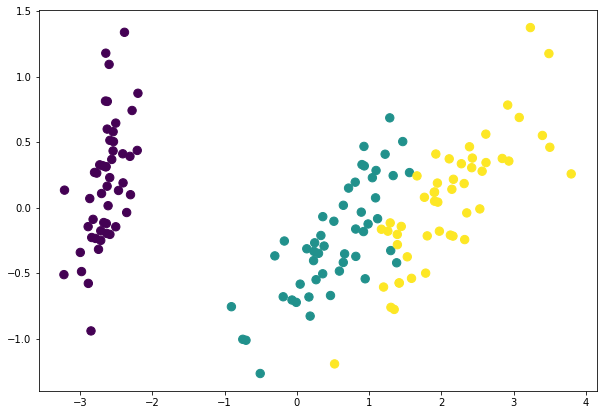

In [4]:
from sklearn import datasets

iris = datasets.load_iris()
X, y = iris.data, iris.target

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

print("Meaning of the 2 components:")
for component in pca.components_:
    print(" + ".join("%.3f x %s" % (value, name)
                     for value, name in zip(component,
                                            iris.feature_names)))
plt.figure(figsize=(10,7))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, s=70, cmap='viridis')
plt.show()

### Пример с набором данных digits

Рассмотрим применение метода главных компонент для визуализации данных из набора изображений рукописных цифр.

Projecting 64-dimensional data to 2D


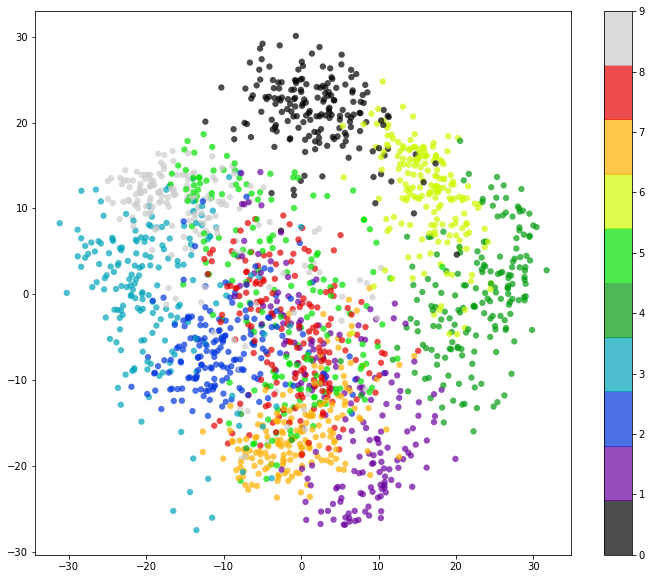

In [5]:
from sklearn.datasets import load_digits

digits = load_digits()
X = digits.data
y = digits.target

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

print('Projecting %d-dimensional data to 2D' % X.shape[1])

plt.figure(figsize=(12,10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.show()

Полученная картинка позволяет увидеть зависимости между различными цифрами. Например, цифры 0 и 6 располагаются в соседних кластерах, что говорит об их схожем написании. Наиболее "разбросанный" (по другим кластерам) – это кластер, соответствующий цифре 8, что говорит о том, что она имеет много различных написаний, делающих её схожей со многими другими цифрами.

Посмотрим, как выглядят первые две главные компоненты.

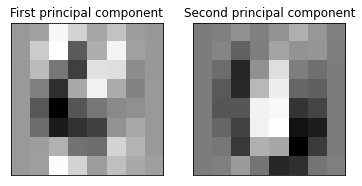

In [6]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

im = pca.components_[0]
ax1.imshow(im.reshape((8, 8)), cmap='binary')
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title('First principal component')

im = pca.components_[1]
ax2.imshow(im.reshape((8, 8)), cmap='binary')
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_title('Second principal component')
plt.show()

### Сжатие данных

Другим применением PCA является снижение размерности данных для их сжатия. Рассмотрим, как влияет число отбираемых главных компонент (на которые осуществляется проекция) на качество восстановления исходного изображения.

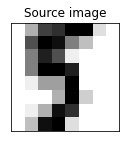

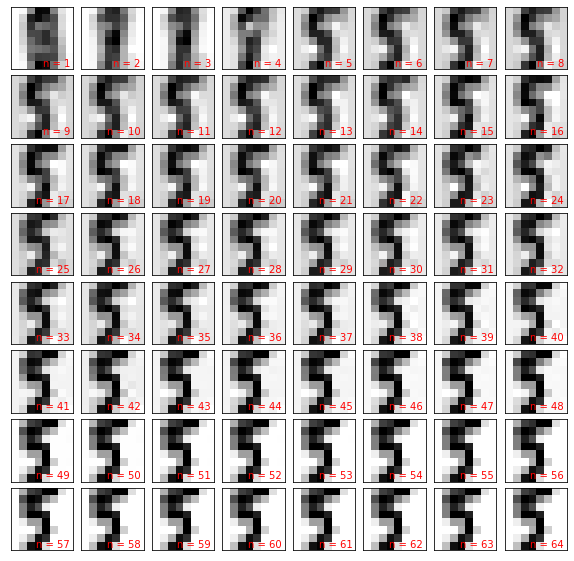

In [7]:
plt.figure(figsize=(4,2))
plt.imshow(X[15].reshape((8, 8)), cmap='binary')
plt.xticks([])
plt.yticks([])
plt.title('Source image')
plt.show()

fig, axes = plt.subplots(8, 8, figsize=(10, 10))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for i, ax in enumerate(axes.flat):
    pca = PCA(i + 1).fit(X)
    im = pca.inverse_transform(pca.transform(X[15].reshape(1, -1)))

    ax.imshow(im.reshape((8, 8)), cmap='binary')
    ax.text(0.95, 0.05, 'n = {0}'.format(i + 1), ha='right',
            transform=ax.transAxes, color='red')
    ax.set_xticks([])
    ax.set_yticks([])

Как понять, какое число главных компонент достаточно оставить? Для этого может оказаться полезным следующий график, выражающий зависимость общей доли объясняемой дисперсии от числа главных компонент.

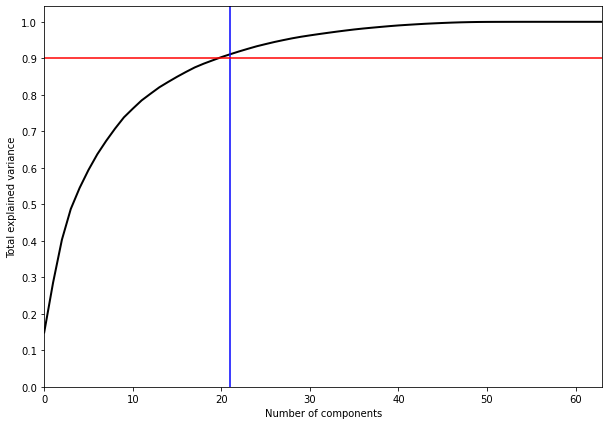

In [8]:
pca = PCA().fit(X)

plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
plt.xlim(0, 63)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axvline(21, c='b')
plt.axhline(0.9, c='r')
plt.show()

In [9]:
pca = PCA(0.9).fit(X)
print('We need %d components to explain 90%% of variance' 
      % pca.n_components_)

We need 21 components to explain 90% of variance


### Предобработка данных

Метод главных компонент часто используется для предварительной обработки данных перед обучением классификатора. В качестве примера такого применения рассмотрим задачу о распознавании лиц. 

Для начала посмотрим на исходные данные.

In [10]:
%%time
from sklearn import datasets
from sklearn.model_selection import train_test_split

lfw_people = datasets.fetch_lfw_people(min_faces_per_person=50, 
                resize=0.4, data_home='../../data/faces')

print('%d objects, %d features, %d classes' % (lfw_people.data.shape[0],
      lfw_people.data.shape[1], len(lfw_people.target_names)))
print('\nPersons:')
for name in lfw_people.target_names:
    print(name)
    

1560 objects, 1850 features, 12 classes

Persons:
Ariel Sharon
Colin Powell
Donald Rumsfeld
George W Bush
Gerhard Schroeder
Hugo Chavez
Jacques Chirac
Jean Chretien
John Ashcroft
Junichiro Koizumi
Serena Williams
Tony Blair
Wall time: 2min 20s


Распределение целевого класса:

In [11]:
for i, name in enumerate(lfw_people.target_names):
    print("{}: {} photos.".format(name, (lfw_people.target == i).sum()))

Ariel Sharon: 77 photos.
Colin Powell: 236 photos.
Donald Rumsfeld: 121 photos.
George W Bush: 530 photos.
Gerhard Schroeder: 109 photos.
Hugo Chavez: 71 photos.
Jacques Chirac: 52 photos.
Jean Chretien: 55 photos.
John Ashcroft: 53 photos.
Junichiro Koizumi: 60 photos.
Serena Williams: 52 photos.
Tony Blair: 144 photos.


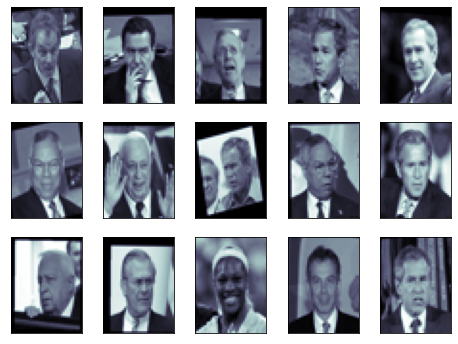

In [12]:
fig = plt.figure(figsize=(8, 6))

for i in range(15):
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(lfw_people.images[i], cmap='bone')

In [13]:
X_train, X_test, y_train, y_test = \
    train_test_split(lfw_people.data, lfw_people.target, random_state=0)

print('Train size:', X_train.shape[0], 'Test size:', X_test.shape[0])

Train size: 1170 Test size: 390


Вместо обычного PCA воспользуемся его приближенной версией (randomized PCA), которая позволяет существенно ускорить работу алгоритма на больших наборах данных. Выделим 100 главных компонент. Как видно, они объясняют более 90% дисперсии исходных данных.

100 principal components explain 90.28% of variance


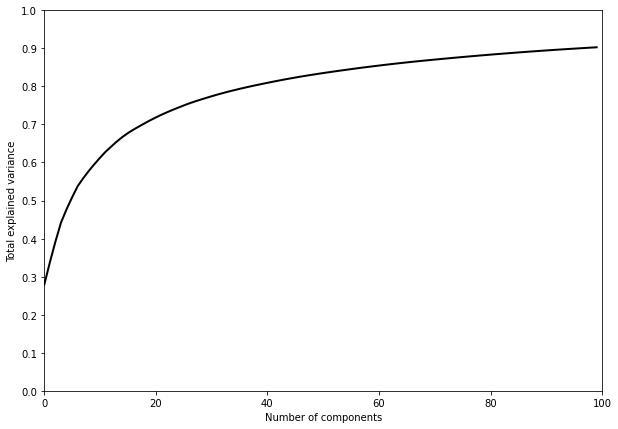

In [14]:
pca = PCA(n_components=100, svd_solver='randomized')
pca.fit(X_train)

print('100 principal components explain %.2f%% of variance' %
      (100 * np.cumsum(pca.explained_variance_ratio_)[-1]))
plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_), lw=2, color='k')
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
plt.xlim(0, 100)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.show()

Посмотрим на главные компоненты (или главные "лица"). Видим, что первые главные компоненты несут в себе информацию в основном об освещении на фотографии, в то время как оставшиеся выделяют какие-то отдельные черты человеческого лица - глаза, брови и другие.

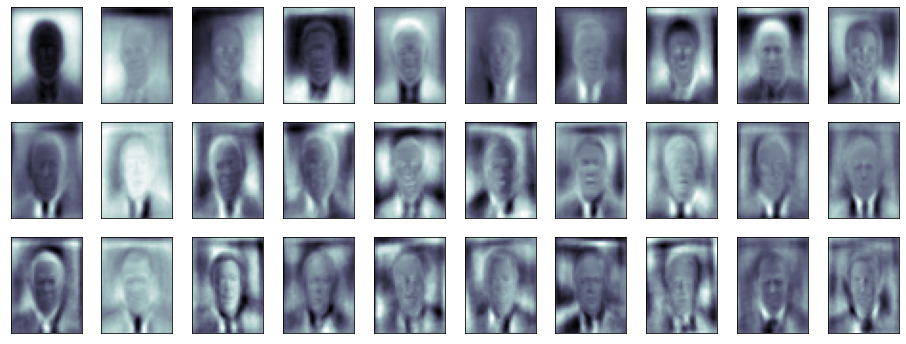

In [15]:
fig = plt.figure(figsize=(16, 6))
for i in range(30):
    ax = fig.add_subplot(3, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(pca.components_[i].reshape((50, 37)), cmap='bone')

PCA позволяет посмотреть на "среднее" лицо – тут считается среднее по каждому новому признаку.

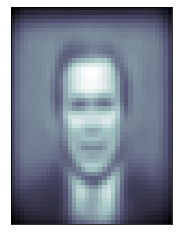

In [16]:
plt.imshow(pca.mean_.reshape((50, 37)), cmap='bone')
plt.xticks([])
plt.yticks([])
plt.show()

Перейдем теперь непосредственно к классификации. Мы сократили размерность данных (с 1850 признаков до 100), что позволяет существенно ускорить  работу стандартных алгоритмов обучения. Настроим SVM с RBF-ядром и посмотрим на результаты классификации.

In [17]:
%%time
from sklearn.svm import LinearSVC

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

clf = LinearSVC(random_state=17).fit(X_train_pca, y_train)
y_pred = clf.predict(X_test_pca)

Wall time: 750 ms


C:\Users\ivan\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Accuracy: 0.648718
                   precision    recall  f1-score   support

     Ariel Sharon       0.60      0.60      0.60        15
     Colin Powell       0.73      0.74      0.73        65
  Donald Rumsfeld       0.46      0.38      0.42        29
    George W Bush       0.72      0.83      0.77       133
Gerhard Schroeder       0.63      0.52      0.57        33
      Hugo Chavez       0.43      0.38      0.40        16
   Jacques Chirac       0.20      0.25      0.22        12
    Jean Chretien       0.14      0.10      0.12        10
    John Ashcroft       1.00      0.39      0.56        18
Junichiro Koizumi       0.75      0.82      0.78        11
  Serena Williams       0.92      0.63      0.75        19
       Tony Blair       0.54      0.66      0.59        29

         accuracy                           0.65       390
        macro avg       0.59      0.52      0.54       390
     weighted avg       0.66      0.65      0.64       390



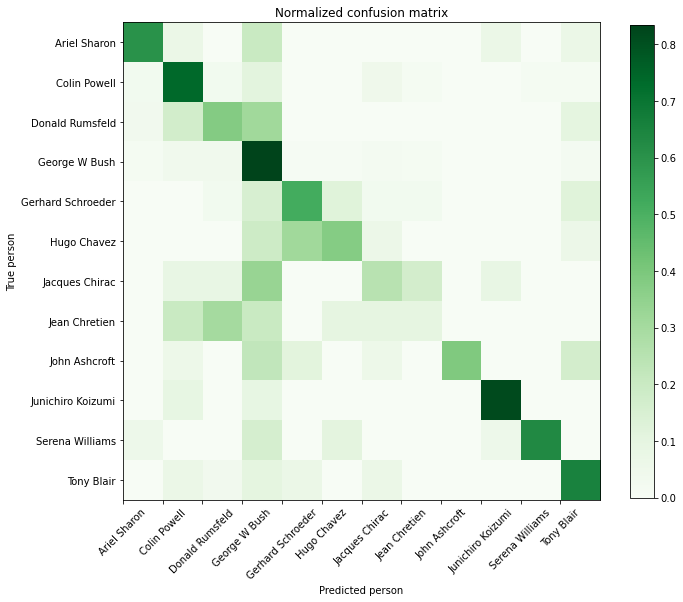

In [18]:
from sklearn.metrics import (accuracy_score, classification_report,
                             confusion_matrix)

print("Accuracy: %f" % accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=lfw_people.target_names))

M = confusion_matrix(y_test, y_pred)
M_normalized = M.astype('float') / M.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(10,10))
im = plt.imshow(M_normalized, interpolation='nearest', cmap='Greens')
plt.colorbar(im, shrink=0.71)
tick_marks = np.arange(len(lfw_people.target_names))
plt.xticks(tick_marks - 0.5, lfw_people.target_names, rotation=45)
plt.yticks(tick_marks, lfw_people.target_names)
plt.tight_layout()
plt.ylabel('True person')
plt.xlabel('Predicted person')
plt.title('Normalized confusion matrix')
plt.show()

# SVC

In [22]:
from sklearn.svm import LinearSVC

In [23]:
%%time
svm = LinearSVC(random_state=0)
svm.fit(X_train, y_train)

Wall time: 18.9 s


C:\Users\ivan\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(random_state=0)

In [27]:
svm.predict(X_test)

array([ 3,  9,  3, 11,  0,  3,  1,  1,  0,  3,  9,  9,  3,  2,  1, 10, 10,
        3,  3,  3,  0,  0,  3,  4,  2,  3,  3,  4,  3,  9,  7,  5,  6,  3,
        1,  4, 10,  1,  1,  3, 11,  9,  3, 11,  3,  9, 11, 11,  3,  1,  5,
       11,  1,  3, 11,  3,  1,  4,  1,  3,  3,  3,  1,  3,  3, 11,  3,  3,
       11,  4,  5,  3,  7,  3,  1,  2,  3,  3,  3,  3,  3,  4,  3,  3,  3,
        3,  3,  3,  3,  3, 11,  3,  0,  1,  1,  3,  3,  9,  3,  0,  1,  3,
        3,  3,  2,  4,  3,  3,  3,  0,  1,  4,  1,  2, 10,  3,  3,  1,  2,
        5,  4,  3,  1,  6,  0,  1,  8,  0,  3,  2,  3,  3,  6,  3,  4,  5,
       10,  3,  7,  3,  1, 10,  2,  1,  7, 11,  3,  3,  1,  3,  0,  3,  3,
        1,  3,  2,  1,  6,  1,  7,  3,  3,  8,  3,  3,  3,  3,  1,  1,  3,
        3,  1,  1,  5, 11,  3,  1, 11,  3,  3,  0,  6,  1,  3, 10, 11,  3,
        3,  3,  3,  9,  6, 11, 11,  1,  8,  3,  4,  5,  2,  3, 10, 11,  9,
        3, 10,  3,  1,  1,  3,  1,  4,  1,  5,  3,  4,  3, 11,  4,  2,  1,
        1,  3,  2,  4, 11

Accuracy: 0.776923
                   precision    recall  f1-score   support

     Ariel Sharon       0.72      0.87      0.79        15
     Colin Powell       0.88      0.80      0.84        65
  Donald Rumsfeld       0.62      0.55      0.58        29
    George W Bush       0.81      0.92      0.86       133
Gerhard Schroeder       0.74      0.52      0.61        33
      Hugo Chavez       0.77      0.62      0.69        16
   Jacques Chirac       0.50      0.42      0.45        12
    Jean Chretien       0.43      0.60      0.50        10
    John Ashcroft       0.92      0.67      0.77        18
Junichiro Koizumi       0.75      0.82      0.78        11
  Serena Williams       0.94      0.89      0.92        19
       Tony Blair       0.71      0.83      0.76        29

         accuracy                           0.78       390
        macro avg       0.73      0.71      0.71       390
     weighted avg       0.78      0.78      0.77       390



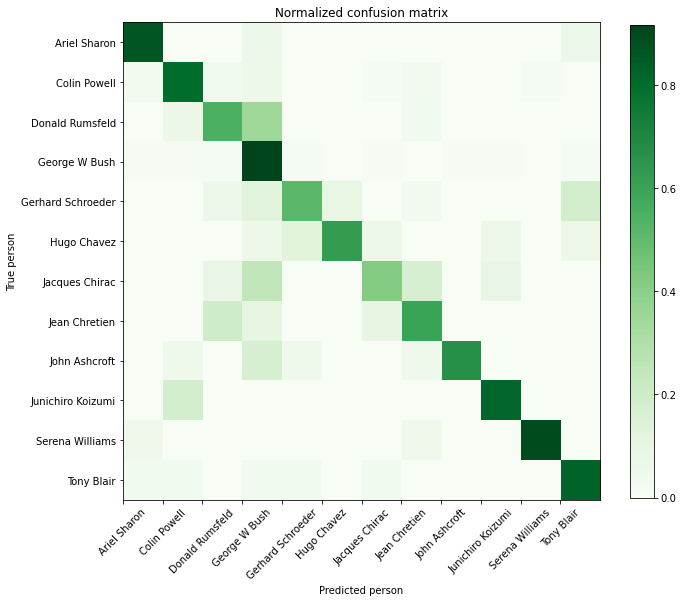

In [29]:
from sklearn.metrics import (accuracy_score, classification_report,
                             confusion_matrix)

print("Accuracy: %f" % accuracy_score(y_test, svm.predict(X_test)))
print(classification_report(y_test, svm.predict(X_test), target_names=lfw_people.target_names))

M = confusion_matrix(y_test, svm.predict(X_test))
M_normalized = M.astype('float') / M.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(10,10))
im = plt.imshow(M_normalized, interpolation='nearest', cmap='Greens')
plt.colorbar(im, shrink=0.71)
tick_marks = np.arange(len(lfw_people.target_names))
plt.xticks(tick_marks - 0.5, lfw_people.target_names, rotation=45)
plt.yticks(tick_marks, lfw_people.target_names)
plt.tight_layout()
plt.ylabel('True person')
plt.xlabel('Predicted person')
plt.title('Normalized confusion matrix')
plt.show()

# logit

In [30]:
from sklearn.linear_model import LogisticRegression 

In [31]:
%%time
logit = LogisticRegression(random_state=0)
logit.fit(X_train, y_train)

Wall time: 1.24 s


C:\Users\ivan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [32]:
logit.predict(X_test)

array([ 3,  2,  3, 11,  3,  3,  1,  1,  0,  3,  6,  9,  3, 11,  1,  3, 10,
        3,  3,  3,  0,  3,  3,  4,  2,  3,  3,  3,  3,  9,  1,  5,  6,  3,
        1,  4, 10,  1,  1,  3, 11,  9,  3, 11,  2,  3, 11, 11,  3,  1,  3,
       11,  1,  3, 11,  3,  1,  4,  1,  3,  3,  3,  1,  3,  3, 11,  3,  3,
       11,  4,  3,  3,  7,  3,  1,  2,  3,  3,  3,  3,  3,  4,  3,  3,  3,
        3,  4,  3,  3,  3, 11,  3,  0,  1,  9,  3,  3,  9,  3,  0,  1,  3,
        3,  3,  2,  4,  3,  3,  3,  0,  1,  4,  1,  2, 10,  4,  3,  1,  2,
        5,  4,  3,  1,  6,  0,  1,  8,  0,  4,  2,  3,  3,  6,  3,  4,  6,
       10,  3,  7,  3,  1, 10,  2,  1,  1, 11,  3,  3,  1,  3,  0,  3,  3,
        1,  3,  2,  1,  6,  1,  7,  3,  3,  8,  3,  2,  3,  3,  1,  1,  3,
        3,  1,  1,  4, 11,  3,  1, 11,  3,  3, 10,  9,  1,  3, 10,  4,  3,
        3,  3,  3,  9,  6,  4, 11,  1,  8,  3,  4,  5,  2,  3, 10, 11,  9,
        3, 10,  3,  1,  3,  3,  1,  4,  1,  4,  3,  4,  3,  3,  4,  2,  1,
        1,  3,  2,  4, 11

In [47]:
logit.predict(X_test).shape

(390,)

Accuracy: 0.756410
                   precision    recall  f1-score   support

     Ariel Sharon       0.73      0.73      0.73        15
     Colin Powell       0.87      0.83      0.85        65
  Donald Rumsfeld       0.63      0.59      0.61        29
    George W Bush       0.77      0.89      0.83       133
Gerhard Schroeder       0.70      0.64      0.67        33
      Hugo Chavez       0.62      0.31      0.42        16
   Jacques Chirac       0.45      0.42      0.43        12
    Jean Chretien       0.36      0.40      0.38        10
    John Ashcroft       1.00      0.50      0.67        18
Junichiro Koizumi       0.83      0.91      0.87        11
  Serena Williams       0.94      0.84      0.89        19
       Tony Blair       0.71      0.83      0.76        29

         accuracy                           0.76       390
        macro avg       0.72      0.66      0.68       390
     weighted avg       0.76      0.76      0.75       390



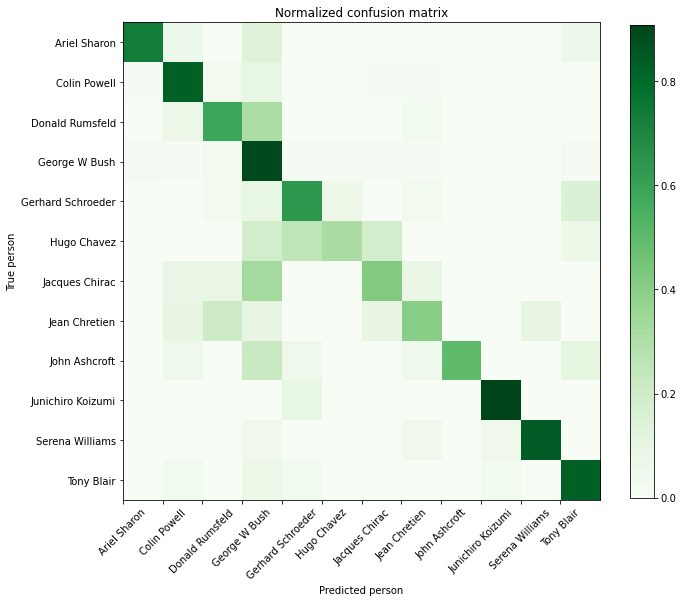

In [33]:
from sklearn.metrics import (accuracy_score, classification_report,
                             confusion_matrix)

print("Accuracy: %f" % accuracy_score(y_test, logit.predict(X_test)))
print(classification_report(y_test, logit.predict(X_test), target_names=lfw_people.target_names))

M = confusion_matrix(y_test, logit.predict(X_test))
M_normalized = M.astype('float') / M.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(10,10))
im = plt.imshow(M_normalized, interpolation='nearest', cmap='Greens')
plt.colorbar(im, shrink=0.71)
tick_marks = np.arange(len(lfw_people.target_names))
plt.xticks(tick_marks - 0.5, lfw_people.target_names, rotation=45)
plt.yticks(tick_marks, lfw_people.target_names)
plt.tight_layout()
plt.ylabel('True person')
plt.xlabel('Predicted person')
plt.title('Normalized confusion matrix')
plt.show()

# GridSearchCV (logit)

In [34]:
from sklearn.model_selection import GridSearchCV

In [35]:
lg = LogisticRegression(random_state=0)

In [36]:
lg_params = {'C': [0.001, 0.01, 0.1, 1, 10]}

In [37]:
lg_grid = GridSearchCV(lg, lg_params, cv=5, n_jobs=-1, verbose=True) 
#объект перебора по решетке для логрега, n_job - задействуем все ядра

In [38]:
%%time
lg_grid.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Wall time: 24.6 s


C:\Users\ivan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(cv=5, estimator=LogisticRegression(random_state=0), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10]}, verbose=True)

In [39]:
lg_grid.best_estimator_

LogisticRegression(C=1, random_state=0)

In [40]:
lg_grid.best_estimator_.predict(X_test)

array([ 3,  2,  3, 11,  3,  3,  1,  1,  0,  3,  6,  9,  3, 11,  1,  3, 10,
        3,  3,  3,  0,  3,  3,  4,  2,  3,  3,  3,  3,  9,  1,  5,  6,  3,
        1,  4, 10,  1,  1,  3, 11,  9,  3, 11,  2,  3, 11, 11,  3,  1,  3,
       11,  1,  3, 11,  3,  1,  4,  1,  3,  3,  3,  1,  3,  3, 11,  3,  3,
       11,  4,  3,  3,  7,  3,  1,  2,  3,  3,  3,  3,  3,  4,  3,  3,  3,
        3,  4,  3,  3,  3, 11,  3,  0,  1,  9,  3,  3,  9,  3,  0,  1,  3,
        3,  3,  2,  4,  3,  3,  3,  0,  1,  4,  1,  2, 10,  4,  3,  1,  2,
        5,  4,  3,  1,  6,  0,  1,  8,  0,  4,  2,  3,  3,  6,  3,  4,  6,
       10,  3,  7,  3,  1, 10,  2,  1,  1, 11,  3,  3,  1,  3,  0,  3,  3,
        1,  3,  2,  1,  6,  1,  7,  3,  3,  8,  3,  2,  3,  3,  1,  1,  3,
        3,  1,  1,  4, 11,  3,  1, 11,  3,  3, 10,  9,  1,  3, 10,  4,  3,
        3,  3,  3,  9,  6,  4, 11,  1,  8,  3,  4,  5,  2,  3, 10, 11,  9,
        3, 10,  3,  1,  3,  3,  1,  4,  1,  4,  3,  4,  3,  3,  4,  2,  1,
        1,  3,  2,  4, 11

# Bagging

In [41]:
import seaborn as sns
from sklearn.datasets import make_circles
from sklearn.ensemble import (BaggingClassifier, BaggingRegressor,
                              RandomForestClassifier, RandomForestRegressor)
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor


In [65]:
bdt = BaggingClassifier(DecisionTreeClassifier(max_depth=20, min_samples_leaf=10), n_estimators = 100).fit(X_train, y_train)
bdt_predict = bdt.predict(X_test)

In [66]:
bdt_predict

array([ 3,  3,  3,  3,  3,  3,  1,  1,  0,  3,  1,  9,  3, 11,  1,  0, 10,
        4,  3,  3,  0,  3,  3,  4,  7,  3,  0,  3,  3,  3,  1,  5,  5,  3,
        1,  4, 10,  1,  1,  3,  3,  5,  3,  3,  3,  3, 11, 11,  3,  1,  3,
       11,  3,  3, 11,  3,  1,  4,  1,  3,  3,  3,  1,  3,  3, 11,  3,  3,
       11,  3,  3,  3,  7,  3,  1,  3,  3,  3,  3,  3,  3,  4,  3,  3,  3,
        3,  4,  3,  3,  3, 11,  3,  3,  1,  9,  3,  3,  9,  3,  0,  1,  3,
        3,  3,  2,  4,  3,  3,  3,  0,  1, 11,  1,  3, 10,  4,  3,  3,  3,
        5,  4,  3,  1,  3,  0,  3,  8,  0,  3,  3,  3,  4,  3,  3,  4,  5,
        3,  3, 11,  3,  1,  3,  3,  1,  1, 11,  0,  3,  3,  3,  0,  3,  3,
        1,  3,  3,  1,  3,  1,  3,  3,  3, 11,  3,  3,  3,  3,  1,  0,  3,
        3,  3,  1,  4,  3,  3,  3, 11,  3,  3, 10,  4,  1,  3, 10,  5,  3,
        3,  3,  3,  9,  3,  4,  3,  3,  8,  3,  4,  5,  0,  3, 10,  3,  9,
        3,  3,  3,  4,  3,  3,  1,  4,  1,  5,  3,  3,  3,  3,  4,  3,  1,
        1,  3,  2,  5, 11

In [60]:
bdt_predict.shape, y_test.shape

((390,), (390,))

Accuracy: 0.676923
                   precision    recall  f1-score   support

     Ariel Sharon       0.75      0.80      0.77        15
     Colin Powell       0.81      0.71      0.75        65
  Donald Rumsfeld       1.00      0.14      0.24        29
    George W Bush       0.61      0.95      0.75       133
Gerhard Schroeder       0.71      0.61      0.66        33
      Hugo Chavez       0.52      0.69      0.59        16
   Jacques Chirac       0.00      0.00      0.00        12
    Jean Chretien       0.60      0.30      0.40        10
    John Ashcroft       1.00      0.17      0.29        18
Junichiro Koizumi       0.90      0.82      0.86        11
  Serena Williams       1.00      0.68      0.81        19
       Tony Blair       0.62      0.55      0.58        29

         accuracy                           0.68       390
        macro avg       0.71      0.53      0.56       390
     weighted avg       0.71      0.68      0.64       390



C:\Users\ivan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ivan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ivan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


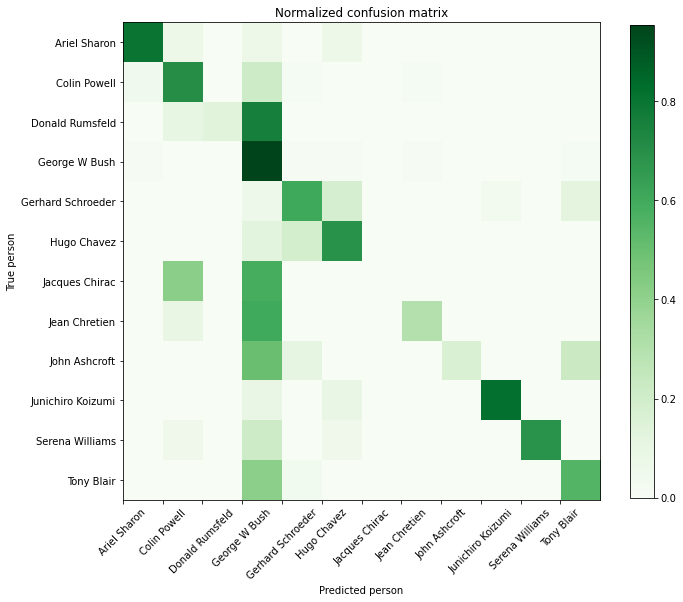

In [67]:
print("Accuracy: %f" % accuracy_score(y_test, bdt_predict))
print(classification_report(y_test, bdt_predict, target_names=lfw_people.target_names))

M = confusion_matrix(y_test, bdt_predict)
M_normalized = M.astype('float') / M.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(10,10))
im = plt.imshow(M_normalized, interpolation='nearest', cmap='Greens')
plt.colorbar(im, shrink=0.71)
tick_marks = np.arange(len(lfw_people.target_names))
plt.xticks(tick_marks - 0.5, lfw_people.target_names, rotation=45)
plt.yticks(tick_marks, lfw_people.target_names)
plt.tight_layout()
plt.ylabel('True person')
plt.xlabel('Predicted person')
plt.title('Normalized confusion matrix')
plt.show()